# # EB5204 New Media & Sentiment Mining - Naive Bayes and SVM Classifier

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk import pos_tag
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from __future__ import unicode_literals
import spacy
import re

### Load 1 review dataset

In [2]:
with open(os.path.join('data', 'reviews', 'yelp_menya-musashi-singapore?start=.json')) as read_file:
    reviews = json.load(read_file)

In [3]:
len(reviews['review'])

18

In [4]:
reviews['review'][0]

{'author': 'Conan H.',
 'datePublished': '2013-01-22',
 'description': "Its above average as ramen goes - and a real value meal if you order the tsukemen because you can order up to 5 portions of noodles for the same price. Perfect for the hungry hippo.\n\nThe black soup comes recommended. Service is typical Singaporean nonsense.\n\nI lived in Tokyo for over a decade and am a purveyor of good ramen. 5 years ago there were only mediocre places. Now you have this, Ippudou and Tonkotsu King. I'd say the latter is one of the best.",
 'reviewRating': {'ratingValue': 4}}

In [5]:
reviews['aggregateRating']

{'@type': 'AggregateRating', 'ratingValue': 3.5, 'reviewCount': 18}

### Load all the reviews

In [6]:
reviews = []
for afile in os.listdir(os.path.join('data', 'reviews')):
    if os.path.isfile(os.path.join('data', 'reviews', afile)):
        print(afile)
        with open(os.path.join('data', 'reviews', afile)) as read_file:
            reviews.append(json.load(read_file))

yelp_wild-honey-singapore?start=.json
yelp_imperial-treasure-super-peking-duck-singapore?start=.json
yelp_anti-dote-singapore?start=.json
yelp_trattoria-gallo-d-oro-singapore?start=.json
yelp_mortons-the-steak-house-singapore?start=.json
yelp_peperoni-pizzeria-singapore-8?start=.json
yelp_candlenut-singapore-2?start=.json
yelp_food-for-thought-singapore?start=.json
yelp_madrinaa-italiano-singapore?start=.json
yelp_robolots-singapore?start=.json
yelp_corner-house-singapore?start=.json
yelp_cut-singapore-2?start=.json
yelp_long-phung-vietnamese-restaurant-singapore?start=.json
yelp_first-thai-food-singapore?start=.json
yelp_two-men-bagel-house-singapore?start=.json
yelp_little-saigon-singapore?start=.json
yelp_ikyu-singapore?start=.json
yelp_silver-kris-lounge-singapore?start=.json
yelp_28-hong-kong-street-singapore?start=.json
yelp_le-bistrot-du-sommelier-singapore?start=.json
yelp_jones-the-grocer-singapore-3?start=.json
yelp_jaan-singapore?start=.json
yelp_trattoria-lafiandra-singapor

yelp_bar-stories-singapore-2?start=.json
yelp_khansama-tandoori-singapore?osq=indian?start=.json
yelp_dulukala-peranakan-house-singapore?start=.json
yelp_tawandang-microbrewery-singapore?start=.json
yelp_the-auld-alliance-singapore-2?start=.json
yelp_montana-brew-bar-singapore?start=.json
yelp_freshly-baked-by-le-bijoux-singapore?start=.json
yelp_fatboys-the-burger-bar-singapore-3?start=.json
yelp_the-populus-coffee-and-food-co-singapore?start=.json
yelp_chilis-singapore-3?start=.json
yelp_brewerkz-singapore-2?start=.json
yelp_potato-head-folk-singapore-2?start=.json
yelp_new-ubin-seafood-singapore?start=.json
yelp_hooters-singapore?start=.json
yelp_the-assembly-ground-singapore?start=.json
yelp_the-white-rabbit-singapore?start=.json
yelp_the-coastal-settlement-singapore?start=.json
yelp_zam-zam-restaurant-singapore?osq=indian?start=.json
yelp_the-line-singapore?start=.json
yelp_istanbul-grills-and-cafe-singapore?start=.json
yelp_burger-joint-singapore?start=.json
yelp_morganfields-sin

yelp_blue-ginger-singapore?start=.json
yelp_black-angus-steakhouse-singapore?start=.json
yelp_el-mero-mero-singapore?start=.json
yelp_the-university-club-lounge-and-dining-room-singapore?start=.json
yelp_vatos-urban-tacos-singapore?start=.json
yelp_harrys-singapore-8?start=.json
yelp_comnam-singapore?start=.json
yelp_tobys-estate-singapore?start=.json
yelp_cafe-by-the-quad-singapore?start=.json
yelp_antoinette-singapore?start=.json
yelp_the-black-swan-singapore?start=.json
yelp_boomarang-singapore?start=.json
yelp_saveur-singapore?start=.json
yelp_mondo-mio-singapore-singapore?start=.json
yelp_super-loco-singapore?start=.json
yelp_the-long-bar-singapore?start=.json
yelp_the-boiler-seafood-bar-and-beer-singapore?start=.json
yelp_loof-singapore?start=.json
yelp_canelé-pâtisserie-chocolaterie-singapore-3?start=.json
yelp_jigger-and-pony-singapore?start=.json
yelp_the-market-grill-singapore?start=.json
yelp_prego-singapore?start=.json
yelp_artichoke-cafe-and-bar-singapore?start=.json
yelp_

yelp_ivins-nyonya-specialist-singapore?start=.json
yelp_straits-cafe-singapore?start=.json
yelp_chilli-padi-nonya-singapore?start=.json
yelp_lawrys-the-prime-rib-singapore-singapore?start=.json
yelp_the-burger-bar-singapore-2?start=.json
yelp_clinton-street-baking-company-and-restaurant-singapore?start=.json
yelp_the-good-beer-company-singapore-2?start=.json
yelp_paul-singapore-3?start=.json
yelp_guzman-y-gomez-singapore-5?start=.json
yelp_manhattan-singapore?start=.json
yelp_straitskitchen-singapore?start=.json
yelp_piedra-negra-singapore?start=.json
yelp_el-patio-mexican-restaurant-and-wine-bar-singapore?start=.json
yelp_hatched-singapore-2?start=.json
yelp_25-degrees-singapore?start=.json
yelp_komala-vilas-restaurant-singapore?osq=indian?start=.json
yelp_the-curry-cultures-no-title?osq=indian?start=.json
yelp_grub-singapore?start=.json
yelp_chicken-up-singapore?start=.json
yelp_the-lokal-singapore?start=.json
yelp_delifrance-singapore?start=.json
yelp_boomarang-bistro-and-bar-singap

yelp_the-bar-at-mortons-singapore?start=.json
yelp_penny-university-singapore?start=.json
yelp_del-bistro-107-singapore?start=.json
yelp_tim-ho-wan-singapore-7?start=.json
yelp_namnam-noodle-bar-wheelock-place-singapore?start=.json
yelp_smokeys-bbq-singapore?start=.json
yelp_the-square-singapore?start=.json
yelp_trattoria-italian-kitchen-singapore?start=.json
yelp_saizeriya-ristorante-e-caffe-singapore-4?start=.json
yelp_caf%C3%A9-iguana-singapore-2?start=.json
yelp_privé-chijmes-singapore-2?start=.json
yelp_paul-bakery-tanglin-mall-singapore?start=.json
yelp_sandwich-saigon-cafe-singapore?start=.json
yelp_mex-out-singapore?start=.json
yelp_standing-sushi-bar-singapore?start=.json
yelp_the-beast-singapore?start=.json
yelp_cé-la-vi-club-lounge-singapore?start=.json
yelp_bread-street-kitchen-singapore?start=.json
yelp_high-society-singapore-2?start=.json


In [7]:
len(reviews)

155

### Check the total number of reviews

In [8]:
total_reviews = sum([ len(i['review']) for i in reviews ])
total_reviews

2472

In [9]:
reviews[2].keys()

dict_keys(['aggregateRating', 'review', 'servesCuisine', 'priceRange', 'name', 'address', '@context', 'image', '@type', 'telephone'])

In [10]:
reviews[2]['review'][7]

{'author': 'Tin C.',
 'datePublished': '2015-02-21',
 'description': 'Order at cash desk and pay directly. Cash and credit card works. Staff is neural to customers - neither overly friendly nor rude, mostly preoccupied with cleaning and serving the dishes.\nFood arrives rather quick after paying at the cash desk. My pho was okay but nothing fancy. Asked for extra herbs and bean sprouts - still trying to find them in my bowl... The iced jade tea needed a lot of sugar before it was drinkable.',
 'reviewRating': {'ratingValue': 3}}

In [11]:
reviews[2]['name']

'Namnam Noodle Bar'

In [12]:
reviews[2]['servesCuisine']

'Vietnamese'

### Put the reviews into a data frame

In [13]:
df_list = []
for a_restaurant in reviews:
    
    a_df = pd.DataFrame(a_restaurant['review'])
    a_df['reviewRating'] = a_df['reviewRating'].apply(lambda x: x['ratingValue'])
    a_df['name'] = a_restaurant['name']
    a_df['cuisine'] = a_restaurant['servesCuisine']
    df_list.append(a_df)

reviews_df = pd.concat(df_list)
reviews_df.reset_index(drop=True, inplace=True)
reviews_df.head()

,author,datePublished,description,reviewRating,name,cuisine
0,怡,2018-08-05,Beef ball is good! Try the beef combo pho. The...,4,Namnam Noodle Bar,Vietnamese
1,K C.,2018-03-09,Egg noodle with prawns and spare rib- deliciou...,4,Namnam Noodle Bar,Vietnamese
2,Nicola L.,2016-10-13,Egg noodles with prawns and pork rib ($11) - 3...,3,Namnam Noodle Bar,Vietnamese
3,Sisyliana H.,2016-07-02,Banh mi is an amazing sandwich... Now I have h...,4,Namnam Noodle Bar,Vietnamese
4,Jason L.,2014-11-13,Have been seeing Nam Nam with ridiculously lon...,3,Namnam Noodle Bar,Vietnamese


In [14]:
len(reviews_df)

2472

In [15]:
reviews_df.groupby('cuisine').size()

cuisine
Asian Fusion            70
Bistros                  4
Cafes                  405
Chinese                 84
Dim Sum                 37
French                 146
Indian                 244
Italian                 30
Japanese                53
Malaysian                2
Mexican                 78
Modern European         82
Ramen                   18
Shanghainese            43
Singaporean             15
Tapas/Small Plates      40
Thai                    71
Vietnamese            1050
dtype: int64

### Convert the ratings to positive and negative

In [16]:
reviews_df['PosNeg'] = reviews_df['reviewRating'].apply(lambda x: 1 if x > 3 else -1)
reviews_df.head()

,author,datePublished,description,reviewRating,name,cuisine,PosNeg
0,怡,2018-08-05,Beef ball is good! Try the beef combo pho. The...,4,Namnam Noodle Bar,Vietnamese,1
1,K C.,2018-03-09,Egg noodle with prawns and spare rib- deliciou...,4,Namnam Noodle Bar,Vietnamese,1
2,Nicola L.,2016-10-13,Egg noodles with prawns and pork rib ($11) - 3...,3,Namnam Noodle Bar,Vietnamese,-1
3,Sisyliana H.,2016-07-02,Banh mi is an amazing sandwich... Now I have h...,4,Namnam Noodle Bar,Vietnamese,1
4,Jason L.,2014-11-13,Have been seeing Nam Nam with ridiculously lon...,3,Namnam Noodle Bar,Vietnamese,-1


In [17]:
reviews_df.groupby('PosNeg').size()

PosNeg
-1     898
 1    1574
dtype: int64

## Select some restaurants for the test set

In [18]:
test = ['Candlenut', 'National Kitchen', 'Quentin', 'The Square', 'Jaan', 'Le Bistrot Du', 'Prego', 'Saveur', 'First Thai',
        'Jai Thai', 'Whole Earth', 'Yhingthai', 'Little Saigon', 'Long Phung', 'NamNam Noodle Bar - Whee', 'Sandwich Saigon']

In [19]:
def select_for_test(name):
    found = False
    for i in test:
        if i in name:
            found = True
            break
    return found

selected = reviews_df['name'].apply(select_for_test)
reviews_test_df = reviews_df[selected]
reviews_test_df.head()

,author,datePublished,description,reviewRating,name,cuisine,PosNeg
93,Anchisa P.,2018-10-13,4.5 stars. 1 Michelin star Modern Peranakan cu...,4,Candlenut,Asian Fusion,1
94,Vincent Q.,2018-10-02,This is the first time that I have had Peranka...,5,Candlenut,Asian Fusion,1
95,George L.,2018-07-25,Came here to try Michelin Star fine dining res...,3,Candlenut,Asian Fusion,-1
96,Sol A.,2018-04-21,Dining here was not the experience that I expe...,3,Candlenut,Asian Fusion,-1
97,Aimee K.,2018-10-14,"I cannot recommend this restaurant enough, the...",5,Candlenut,Asian Fusion,1


In [20]:
len(reviews_test_df)

364

In [21]:
reviews_test_df.groupby('name').size()

name
Candlenut                             21
First Thai Food                       11
Jaan                                  28
Jai Thai                              17
Le Bistrot Du Sommelier               23
Little Saigon                         28
Long Phung Vietnamese Restaurant      20
NamNam Noodle Bar - Wheelock Place    32
National Kitchen By Violet Oon        20
Prego                                 22
Quentin’s                             12
Sandwich Saigon Cafe                  13
Saveur                                64
The Square                            10
Whole Earth                           27
Yhingthai Palace                      16
dtype: int64

In [22]:
reviews_test_df.groupby('cuisine').size()

cuisine
Asian Fusion     63
French          137
Thai             71
Vietnamese       93
dtype: int64

In [23]:
reviews_test_df.groupby('PosNeg').size()

PosNeg
-1    126
 1    238
dtype: int64

In [24]:
not_selected = [ not i for i in selected ]
reviews_train_df = reviews_df[not_selected]
reviews_train_df.head()

,author,datePublished,description,reviewRating,name,cuisine,PosNeg
0,怡,2018-08-05,Beef ball is good! Try the beef combo pho. The...,4,Namnam Noodle Bar,Vietnamese,1
1,K C.,2018-03-09,Egg noodle with prawns and spare rib- deliciou...,4,Namnam Noodle Bar,Vietnamese,1
2,Nicola L.,2016-10-13,Egg noodles with prawns and pork rib ($11) - 3...,3,Namnam Noodle Bar,Vietnamese,-1
3,Sisyliana H.,2016-07-02,Banh mi is an amazing sandwich... Now I have h...,4,Namnam Noodle Bar,Vietnamese,1
4,Jason L.,2014-11-13,Have been seeing Nam Nam with ridiculously lon...,3,Namnam Noodle Bar,Vietnamese,-1


In [25]:
len(reviews_train_df)

2108

### Load the reviews standard set

In [26]:
std_reviews_df = pd.read_csv(os.path.join('data', 'others', 'train.csv'), encoding = "ISO-8859-1")
std_reviews_df.head()

,restaurant_id,date,review_id,stars,text,Sentiment
0,tr1,3/13/2014,revtrain1,2,Very disappointed in the customer service. We ...,negative
1,tr2,7/15/2010,revtrain2,2,I really wasn't thrilled with our meal here. T...,negative
2,tr2,12/20/2010,revtrain3,1,STAY AWAY...\n\nWe've been 3 times over the pa...,negative
3,tr2,5/26/2011,revtrain4,2,The food is good and the portions are large. ...,negative
4,tr2,6/22/2011,revtrain5,2,I feel bad about giving this place such a meh ...,negative


In [27]:
std_reviews_df['PosNeg'] = std_reviews_df['Sentiment'].apply(lambda x: -1 if 'neg' in x else 1)
std_reviews_df.rename(columns={'text': 'description'}, inplace=True)
std_reviews_df.head()

,restaurant_id,date,review_id,stars,description,Sentiment,PosNeg
0,tr1,3/13/2014,revtrain1,2,Very disappointed in the customer service. We ...,negative,-1
1,tr2,7/15/2010,revtrain2,2,I really wasn't thrilled with our meal here. T...,negative,-1
2,tr2,12/20/2010,revtrain3,1,STAY AWAY...\n\nWe've been 3 times over the pa...,negative,-1
3,tr2,5/26/2011,revtrain4,2,The food is good and the portions are large. ...,negative,-1
4,tr2,6/22/2011,revtrain5,2,I feel bad about giving this place such a meh ...,negative,-1


In [28]:
len(std_reviews_df)

### Add the standard set of reviews to the train set

In [29]:
reviews_train_df = pd.concat([reviews_train_df[['description', 'PosNeg']], std_reviews_df[['description', 'PosNeg']]])
len(reviews_train_df)

22437

### Pre-process the text data

In [30]:
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load('en')

In [31]:
reviews_train_df['description'].values[0]

'Beef ball is good! Try the beef combo pho. The spicy beef soup is a little too spicy.'

In [32]:
doc = nlp(reviews_train_df['description'].values[0])

In [33]:
[ token.pos_ for token in doc ]

['NOUN',
 'NOUN',
 'VERB',
 'ADJ',
 'PUNCT',
 'VERB',
 'DET',
 'NOUN',
 'NOUN',
 'NOUN',
 'PUNCT',
 'DET',
 'ADJ',
 'NOUN',
 'NOUN',
 'VERB',
 'DET',
 'ADJ',
 'ADV',
 'ADJ',
 'PUNCT']

nlp() was not able to run for the complete dataset due to insufficient memory resources. We will use nltk instead.

In [34]:
doc1 = pos_tag(word_tokenize(reviews_train_df['description'].values[0]))
doc1

[('Beef', 'NNP'),
 ('ball', 'NN'),
 ('is', 'VBZ'),
 ('good', 'JJ'),
 ('!', '.'),
 ('Try', 'VB'),
 ('the', 'DT'),
 ('beef', 'NN'),
 ('combo', 'NN'),
 ('pho', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('spicy', 'NN'),
 ('beef', 'NN'),
 ('soup', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('too', 'RB'),
 ('spicy', 'NN'),
 ('.', '.')]

In [35]:
from nltk import WordNetLemmatizer
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''
    
wnl = WordNetLemmatizer()
doc_res = []
for token, postag in doc1:
    pos = get_wordnet_pos(postag)
    if pos:
        doc_res.append((wnl.lemmatize(token, pos=pos), get_wordnet_pos(postag)))
    else:
        doc_res.append((token, postag))
doc_res

[('Beef', 'n'),
 ('ball', 'n'),
 ('be', 'v'),
 ('good', 'a'),
 ('!', '.'),
 ('Try', 'v'),
 ('the', 'DT'),
 ('beef', 'n'),
 ('combo', 'n'),
 ('pho', 'n'),
 ('.', '.'),
 ('The', 'DT'),
 ('spicy', 'n'),
 ('beef', 'n'),
 ('soup', 'n'),
 ('be', 'v'),
 ('a', 'DT'),
 ('little', 'a'),
 ('too', 'r'),
 ('spicy', 'n'),
 ('.', '.')]

In [36]:
[ (wnl.lemmatize(token, pos=get_wordnet_pos(postag)), get_wordnet_pos(postag)) for token, postag in doc1 if get_wordnet_pos(postag) ]

[('Beef', 'n'),
 ('ball', 'n'),
 ('be', 'v'),
 ('good', 'a'),
 ('Try', 'v'),
 ('beef', 'n'),
 ('combo', 'n'),
 ('pho', 'n'),
 ('spicy', 'n'),
 ('beef', 'n'),
 ('soup', 'n'),
 ('be', 'v'),
 ('little', 'a'),
 ('too', 'r'),
 ('spicy', 'n')]

In [37]:
reviews_train_df['desc_tokenised'] = reviews_train_df['description'].apply(
    lambda x: [ wnl.lemmatize(token, pos=get_wordnet_pos(postag))
                for token, postag in pos_tag(word_tokenize(x)) if get_wordnet_pos(postag) ])
reviews_train_df['desc_tokenised'][:5]

0    [Beef, ball, be, good, Try, beef, combo, pho, ...
1    [Egg, noodle, prawn, spare, rib-, delicious, b...
2    [Egg, noodle, prawn, pork, rib, star, Loved, c...
3    [Banh, mi, be, amazing, sandwich, Now, have, h...
4    [Have, be, see, Nam, Nam, ridiculously, long, ...
Name: desc_tokenised, dtype: object

In [38]:
reviews_train_df.groupby('PosNeg').size()

PosNeg
-1    11783
 1    10654
dtype: int64

In [39]:
reviews_test_df['desc_tokenised'] = reviews_test_df['description'].apply(
    lambda x: [ wnl.lemmatize(token, pos=get_wordnet_pos(postag))
                for token, postag in pos_tag(word_tokenize(x)) if get_wordnet_pos(postag) ])
reviews_test_df['desc_tokenised'][:5]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


93    [star, Michelin, star, Modern, Peranakan, cuis...
94    [be, first, time, have, have, Perankan, food, ...
95    [Came, here, try, Michelin, Star, fine, dining...
96    [Dining, here, be, not, experience, expect, on...
97    [not, recommend, restaurant, enough, food, be,...
Name: desc_tokenised, dtype: object

## Prepare the Train / Test Dataset

In [40]:
reviews_train_df.head()

,description,PosNeg,desc_tokenised
0,Beef ball is good! Try the beef combo pho. The...,1,"[Beef, ball, be, good, Try, beef, combo, pho, ..."
1,Egg noodle with prawns and spare rib- deliciou...,1,"[Egg, noodle, prawn, spare, rib-, delicious, b..."
2,Egg noodles with prawns and pork rib ($11) - 3...,-1,"[Egg, noodle, prawn, pork, rib, star, Loved, c..."
3,Banh mi is an amazing sandwich... Now I have h...,1,"[Banh, mi, be, amazing, sandwich, Now, have, h..."
4,Have been seeing Nam Nam with ridiculously lon...,-1,"[Have, be, see, Nam, Nam, ridiculously, long, ..."


In [41]:
reviews_test_df.head()

,author,datePublished,description,reviewRating,name,cuisine,PosNeg,desc_tokenised
93,Anchisa P.,2018-10-13,4.5 stars. 1 Michelin star Modern Peranakan cu...,4,Candlenut,Asian Fusion,1,"[star, Michelin, star, Modern, Peranakan, cuis..."
94,Vincent Q.,2018-10-02,This is the first time that I have had Peranka...,5,Candlenut,Asian Fusion,1,"[be, first, time, have, have, Perankan, food, ..."
95,George L.,2018-07-25,Came here to try Michelin Star fine dining res...,3,Candlenut,Asian Fusion,-1,"[Came, here, try, Michelin, Star, fine, dining..."
96,Sol A.,2018-04-21,Dining here was not the experience that I expe...,3,Candlenut,Asian Fusion,-1,"[Dining, here, be, not, experience, expect, on..."
97,Aimee K.,2018-10-14,"I cannot recommend this restaurant enough, the...",5,Candlenut,Asian Fusion,1,"[not, recommend, restaurant, enough, food, be,..."


In [42]:
# dict for nltk NB classifier
def word_feats(words):
    return dict([ (word, True) for word in words ])

train_featureset = [ (word_feats(reviews_train_df.iloc[i, 2]), reviews_train_df.iloc[i, 1]) for i in range(len(reviews_train_df)) ]
test_featureset = [ (word_feats(reviews_test_df.iloc[i, 7]), reviews_test_df.iloc[i, 6]) for i in range(len(reviews_test_df)) ]

## Train the Naive-Bayes Classifier

In [43]:
## Naive Bayes Rule using nltk
classifier_nb = NaiveBayesClassifier.train(train_featureset)
classifier_nb.show_most_informative_features(10)  # -10 to see positive

Most Informative Features


                  beggar = True                1 : -1     =     66.0 : 1.0
                 chooser = True                1 : -1     =     65.3 : 1.0
                    rib- = True                1 : -1     =     64.5 : 1.0
                  water- = True                1 : -1     =     64.5 : 1.0
               preoccupy = True               -1 : 1      =     54.0 : 1.0
               drinkable = True               -1 : 1      =     54.0 : 1.0
                 orchard = True               -1 : 1      =     53.3 : 1.0
                Terrible = True               -1 : 1      =     53.3 : 1.0
                 Orchard = True                1 : -1     =     52.0 : 1.0
                     Pho = True               -1 : 1      =     48.4 : 1.0


In [44]:
y_train_pred = [ classifier_nb.classify(word_feats(i)) for i in reviews_train_df['desc_tokenised'] ]
y_test_pred = [ classifier_nb.classify(word_feats(i)) for i in reviews_test_df['desc_tokenised'] ]

In [45]:
y_train_pred[:5]

[1, 1, -1, 1, -1]

In [156]:
cf_matrix_train = confusion_matrix(reviews_train_df['PosNeg'].values, y_train_pred)
cf_matrix_train

array([[11610,   173],
       [ 3691,  6963]])

In [47]:
cf_matrix_test = confusion_matrix(reviews_test_df['PosNeg'].values, y_test_pred)
cf_matrix_test

array([[118,   8],
       [121, 117]])

In [48]:
# This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

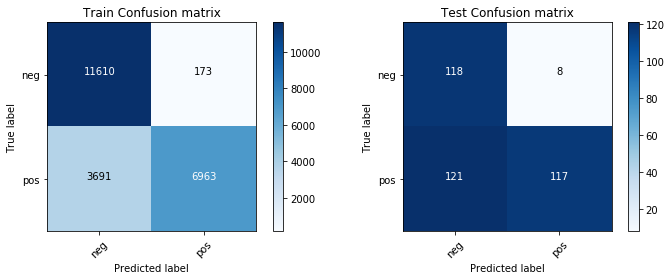

In [49]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_confusion_matrix(cf_matrix_train, classes= ["neg", "pos"], title='Train Confusion matrix')
plt.subplot(122)
plot_confusion_matrix(cf_matrix_test, classes= ["neg", "pos"], title='Test Confusion matrix')
plt.show()

In [50]:
print('Train Results\n\n', classification_report(reviews_train_df['PosNeg'].values, y_train_pred, target_names=['Neg', 'Pos']))

Train Results

               precision    recall  f1-score   support

         Neg       0.76      0.99      0.86     11783
         Pos       0.98      0.65      0.78     10654

   micro avg       0.83      0.83      0.83     22437
   macro avg       0.87      0.82      0.82     22437
weighted avg       0.86      0.83      0.82     22437



In [51]:
print('Test Results\n\n', classification_report(reviews_test_df['PosNeg'], y_test_pred, target_names=['Neg', 'Pos']))

Test Results

               precision    recall  f1-score   support

         Neg       0.49      0.94      0.65       126
         Pos       0.94      0.49      0.64       238

   micro avg       0.65      0.65      0.65       364
   macro avg       0.71      0.71      0.65       364
weighted avg       0.78      0.65      0.65       364



## Train the SVM classifier

In [52]:
' '.join(reviews_train_df['desc_tokenised'].values[0])

'Beef ball be good Try beef combo pho spicy beef soup be little too spicy'

In [53]:
reviews_train_df['desc_tokenised'][:5].apply(lambda x: ' '.join(x)).values

array(['Beef ball be good Try beef combo pho spicy beef soup be little too spicy',
       "Egg noodle prawn spare rib- delicious be queue everyone enjoy meal lose star do n't provide water- even purchase other drink only sell bottled water",
       "Egg noodle prawn pork rib star Loved crunchy texture noodle pork rib be well do However prawn come only stomach taste fishy not fresh Gross Portion be also small do n't taste very authentic Also do n't know actual Vietnamese dish look so perhaps 'm ignorant",
       "Banh mi be amazing sandwich Now have have fair share sandwich grow up New Zealand have eat breakfast dinner have bahn mi get taste lot more just mayo pickle Bahn mi be flavor spice place have 're run Vietnamese people place be quite first then get lively be hit Singapore start day then grab sambal chicken have chicken cook sambal CHILLI 's amaze spice do dish place have n't wait have pho be hard get as well shore New Zealand",
       "Have be see Nam Nam ridiculously long queue

In [54]:
# Using tf-idf docuement vector as features for the SVM classifier
vectorizer = TfidfVectorizer()
# train_vectors = vectorizer.fit_transform(reviews_train_df['description'].values)
# test_vectors = vectorizer.transform(reviews_test_df['description'].values)
train_vectors = vectorizer.fit_transform(reviews_train_df['desc_tokenised'].apply(lambda x: ' '.join(x)).values)
test_vectors = vectorizer.transform(reviews_test_df['desc_tokenised'].apply(lambda x: ' '.join(x)).values)

In [55]:
train_vectors[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [56]:
print ("Train matrix shape " + str(train_vectors.shape))
print ("Test matrix shape " + str(test_vectors.shape))

Train matrix shape (22437, 30745)
Test matrix shape (364, 30745)


In [57]:
print(vectorizer.get_feature_names()[:100])

['00', '00p', '00pm', '01', '02', '04', '05', '06', '07', '08', '09', '0d', '10', '100', '1000', '1007', '104', '10am', '10min', '10mins', '10minutes', '10p', '10pm', '10th', '10x', '11', '11a', '11am', '11p', '11pm', '12', '120', '12am', '12ys', '13', '130', '130th', '13th', '14', '15', '150', '1547736', '155848485', '157cal', '15min', '15mins', '16', '162', '17', '177746751', '18', '18o6avt', '19', '19485', '1955', '1dm_xzefusgbh', '1hr', '1pm', '1st', '20', '200', '2002', '2005', '2006', '2008', '2009', '2010', '20100127chris', '2011', '2012', '2013', '20130212', '2014', '2018', '20mins', '20th', '20yr', '21', '2166', '21st', '22', '22286174', '23', '24', '24045479', '24oz', '25', '250', '25th', '26', '27', '28', '29', '29p', '2a', '2am', '2exiflcfnvhc7albemi2lw', '2fn8mn7uujow', '2hours', '2hr']


In [58]:
# Train the SVM classifier
svm = SVC(C=10000.0, gamma='auto', kernel='rbf')
svm.fit(train_vectors, reviews_train_df['PosNeg'].values)

SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
y_train_predsvm = svm.predict(train_vectors)
y_test_predsvm = svm.predict(test_vectors)

In [60]:
cf_matrix_trainsvm = confusion_matrix(reviews_train_df['PosNeg'].values, y_train_predsvm)
cf_matrix_trainsvm

array([[10994,   789],
       [  684,  9970]])

In [61]:
cf_matrix_testsvm = confusion_matrix(reviews_test_df['PosNeg'].values, y_test_predsvm)
cf_matrix_testsvm

array([[101,  25],
       [ 39, 199]])

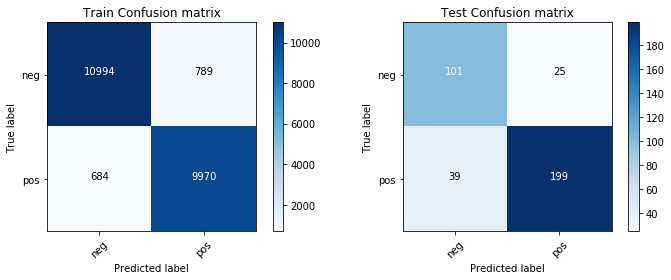

In [62]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_confusion_matrix(cf_matrix_trainsvm, classes= ["neg", "pos"], title='Train Confusion matrix')
plt.subplot(122)
plot_confusion_matrix(cf_matrix_testsvm, classes= ["neg", "pos"], title='Test Confusion matrix')
plt.show()

In [63]:
print('Train Results\n\n', classification_report(reviews_train_df['PosNeg'].values, y_train_predsvm, target_names=['Neg', 'Pos']))

Train Results

               precision    recall  f1-score   support

         Neg       0.94      0.93      0.94     11783
         Pos       0.93      0.94      0.93     10654

   micro avg       0.93      0.93      0.93     22437
   macro avg       0.93      0.93      0.93     22437
weighted avg       0.93      0.93      0.93     22437



In [64]:
print('Test Results\n\n', classification_report(reviews_test_df['PosNeg'].values, y_test_predsvm, target_names=['Neg', 'Pos']))

Test Results

               precision    recall  f1-score   support

         Neg       0.72      0.80      0.76       126
         Pos       0.89      0.84      0.86       238

   micro avg       0.82      0.82      0.82       364
   macro avg       0.80      0.82      0.81       364
weighted avg       0.83      0.82      0.83       364



### Train SVM using unigrams and bigrams

In [65]:
# Using tf-idf docuement vector as features for the SVM classifier
vectorizer_bigram = TfidfVectorizer(ngram_range = (1, 2))
train_vectors_bg = vectorizer_bigram.fit_transform(reviews_train_df['desc_tokenised'].apply(lambda x: ' '.join(x)).values)
test_vectors_bg = vectorizer_bigram.transform(reviews_test_df['desc_tokenised'].apply(lambda x: ' '.join(x)).values)

In [66]:
print ("Train matrix shape " + str(train_vectors_bg.shape))
print ("Test matrix shape " + str(test_vectors_bg.shape))

Train matrix shape (22437, 592321)
Test matrix shape (364, 592321)


In [67]:
print(vectorizer_bigram.get_feature_names()[:100])

['00', '00 flavored', '00 pm', '00p', '00p learn', '00pm', '00pm eat', '00pm web', '01', '01 16', '01 star', '02', '02 type', '04', '04 22', '05', '05 10', '05 16', '05 former', '05 have', '06', '06 06', '06 mitchell', '07', '07 even', '07 so', '08', '08 28', '09', '09 01', '09 admit', '09 noon', '09 so', '0d', '0d also', '10', '10 00p', '10 10', '10 11', '10 12', '10 15', '10 15min', '10 15mins', '10 18', '10 20', '10 2012', '10 23', '10 26', '10 2am', '10 30', '10 30pm', '10 always', '10 anthony', '10 be', '10 breakfast', '10 buck', '10 burger', '10 church', '10 consider', '10 construction', '10 daily', '10 decide', '10 do', '10 dollar', '10 eat', '10 folk', '10 get', '10 give', '10 great', '10 have', '10 heat', '10 hour', '10 least', '10 leisurely', '10 love', '10 madison', '10 make', '10 min', '10 minute', '10 missable', '10 more', '10 multiple', '10 order', '10 other', '10 oz', '10 pages', '10 people', '10 pizza', '10 pm', '10 possible', '10 price', '10 rating', '10 recommend', '1

In [68]:
# Train the SVM classifier
svm_bg = SVC(C=10000.0, gamma='auto', kernel='rbf')
svm_bg.fit(train_vectors_bg, reviews_train_df['PosNeg'].values)

SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [69]:
y_train_predsvmbg = svm_bg.predict(train_vectors_bg)
y_test_predsvmbg = svm_bg.predict(test_vectors_bg)

In [70]:
cf_matrix_trainsvmbg = confusion_matrix(reviews_train_df['PosNeg'].values, y_train_predsvmbg)
cf_matrix_trainsvmbg

array([[11100,   683],
       [ 2496,  8158]])

In [71]:
cf_matrix_testsvmbg = confusion_matrix(reviews_test_df['PosNeg'].values, y_test_predsvmbg)
cf_matrix_testsvmbg

array([[110,  16],
       [ 80, 158]])

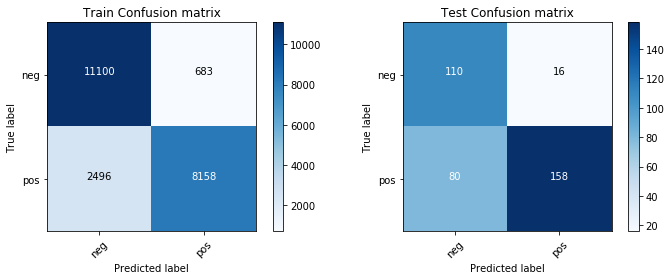

In [72]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_confusion_matrix(cf_matrix_trainsvmbg, classes= ["neg", "pos"], title='Train Confusion matrix')
plt.subplot(122)
plot_confusion_matrix(cf_matrix_testsvmbg, classes= ["neg", "pos"], title='Test Confusion matrix')
plt.show()

In [73]:
print('Train Results\n\n', classification_report(reviews_train_df['PosNeg'].values, y_train_predsvmbg, target_names=['Neg', 'Pos']))

Train Results

               precision    recall  f1-score   support

         Neg       0.82      0.94      0.87     11783
         Pos       0.92      0.77      0.84     10654

   micro avg       0.86      0.86      0.86     22437
   macro avg       0.87      0.85      0.86     22437
weighted avg       0.87      0.86      0.86     22437



In [74]:
print('Test Results\n\n', classification_report(reviews_test_df['PosNeg'].values, y_test_predsvmbg, target_names=['Neg', 'Pos']))

Test Results

               precision    recall  f1-score   support

         Neg       0.58      0.87      0.70       126
         Pos       0.91      0.66      0.77       238

   micro avg       0.74      0.74      0.74       364
   macro avg       0.74      0.77      0.73       364
weighted avg       0.79      0.74      0.74       364



### Use the negation feature with SVM

In [75]:
def neg_tag(text):
    transformed = re.sub(r"\b(?:never|nothing|nowhere|noone|none|not|haven't|hasn't|hasnt|hadn't|hadnt|can't|cant|couldn't|couldnt|shouldn't|shouldnt|won't|wont|wouldn't|wouldnt|don't|dont|doesn't|doesnt|didn't|didnt|isnt|isn't|aren't|arent|aint|ain't|hardly|seldom)\b[\w\s]+[^\w\s]",
                         lambda match: re.sub(r'(\s+)(\w+)', r'\1NEG_\2', match.group(0)), text, flags=re.IGNORECASE)
    return(transformed)

In [76]:
reviews_train_df['desc_neg_tokenised'] = reviews_train_df['description'].apply(lambda x: word_tokenize(neg_tag(x)))
reviews_train_df['desc_neg_tokenised'][:5]

0    [Beef, ball, is, good, !, Try, the, beef, comb...
1    [Egg, noodle, with, prawns, and, spare, rib-, ...
2    [Egg, noodles, with, prawns, and, pork, rib, (...
3    [Banh, mi, is, an, amazing, sandwich, ..., Now...
4    [Have, been, seeing, Nam, Nam, with, ridiculou...
Name: desc_neg_tokenised, dtype: object

In [77]:
reviews_train_df.head()

,description,PosNeg,desc_tokenised,desc_neg_tokenised
0,Beef ball is good! Try the beef combo pho. The...,1,"[Beef, ball, be, good, Try, beef, combo, pho, ...","[Beef, ball, is, good, !, Try, the, beef, comb..."
1,Egg noodle with prawns and spare rib- deliciou...,1,"[Egg, noodle, prawn, spare, rib-, delicious, b...","[Egg, noodle, with, prawns, and, spare, rib-, ..."
2,Egg noodles with prawns and pork rib ($11) - 3...,-1,"[Egg, noodle, prawn, pork, rib, star, Loved, c...","[Egg, noodles, with, prawns, and, pork, rib, (..."
3,Banh mi is an amazing sandwich... Now I have h...,1,"[Banh, mi, be, amazing, sandwich, Now, have, h...","[Banh, mi, is, an, amazing, sandwich, ..., Now..."
4,Have been seeing Nam Nam with ridiculously lon...,-1,"[Have, be, see, Nam, Nam, ridiculously, long, ...","[Have, been, seeing, Nam, Nam, with, ridiculou..."


In [78]:
reviews_test_df['desc_neg_tokenised'] = reviews_test_df['description'].apply(lambda x: word_tokenize(neg_tag(x)))
reviews_test_df['desc_neg_tokenised'][:5]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


93    [4.5, stars, ., 1, Michelin, star, Modern, Per...
94    [This, is, the, first, time, that, I, have, ha...
95    [Came, here, to, try, Michelin, Star, fine, di...
96    [Dining, here, was, not, NEG_the, NEG_experien...
97    [I, can, not, recommend, this, restaurant, eno...
Name: desc_neg_tokenised, dtype: object

In [79]:
train_vectors_neg = vectorizer.fit_transform(reviews_train_df['desc_neg_tokenised'].apply(lambda x: ' '.join(x)).values)
test_vectors_neg = vectorizer.transform(reviews_test_df['desc_neg_tokenised'].apply(lambda x: ' '.join(x)).values)

In [80]:
# Train the SVM classifier
svm_neg = SVC(C=10000.0, gamma='auto', kernel='rbf')
svm_neg.fit(train_vectors_neg, reviews_train_df['PosNeg'].values)

SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
y_train_predsvmng = svm_neg.predict(train_vectors_neg)
y_test_predsvmng = svm_neg.predict(test_vectors_neg)

In [82]:
cf_matrix_trainsvmneg = confusion_matrix(reviews_train_df['PosNeg'].values, y_train_predsvmng)
cf_matrix_trainsvmneg

array([[11052,   731],
       [  692,  9962]])

In [83]:
cf_matrix_testsvmneg = confusion_matrix(reviews_test_df['PosNeg'].values, y_test_predsvmng)
cf_matrix_testsvmneg

array([[100,  26],
       [ 35, 203]])

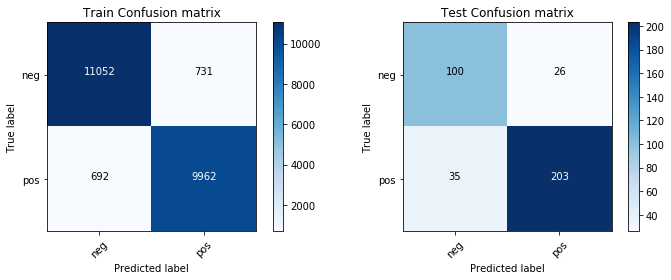

In [84]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_confusion_matrix(cf_matrix_trainsvmneg, classes= ["neg", "pos"], title='Train Confusion matrix')
plt.subplot(122)
plot_confusion_matrix(cf_matrix_testsvmneg, classes= ["neg", "pos"], title='Test Confusion matrix')
plt.show()

In [85]:
print('Train Results\n\n', classification_report(reviews_train_df['PosNeg'].values, y_train_predsvmng, target_names=['Neg', 'Pos']))

Train Results

               precision    recall  f1-score   support

         Neg       0.94      0.94      0.94     11783
         Pos       0.93      0.94      0.93     10654

   micro avg       0.94      0.94      0.94     22437
   macro avg       0.94      0.94      0.94     22437
weighted avg       0.94      0.94      0.94     22437



In [86]:
print('Test Results\n\n', classification_report(reviews_test_df['PosNeg'].values, y_test_predsvmng, target_names=['Neg', 'Pos']))

Test Results

               precision    recall  f1-score   support

         Neg       0.74      0.79      0.77       126
         Pos       0.89      0.85      0.87       238

   micro avg       0.83      0.83      0.83       364
   macro avg       0.81      0.82      0.82       364
weighted avg       0.84      0.83      0.83       364



### Try the SVM using linear kernel

In [158]:
# Train the SVM classifier
lsvm_neg = SVC(C=10000.0, kernel='linear')
lsvm_neg.fit(train_vectors_neg, reviews_train_df['PosNeg'].values)

SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [159]:
y_train_predlsvmng = lsvm_neg.predict(train_vectors_neg)
y_test_predlsvmng = lsvm_neg.predict(test_vectors_neg)

In [160]:
cf_matrix_trainlsvmneg = confusion_matrix(reviews_train_df['PosNeg'].values, y_train_predlsvmng)
cf_matrix_trainlsvmneg

array([[11782,     1],
       [    1, 10653]])

In [161]:
cf_matrix_testlsvmneg = confusion_matrix(reviews_test_df['PosNeg'].values, y_test_predlsvmng)
cf_matrix_testlsvmneg

array([[ 97,  29],
       [ 68, 170]])

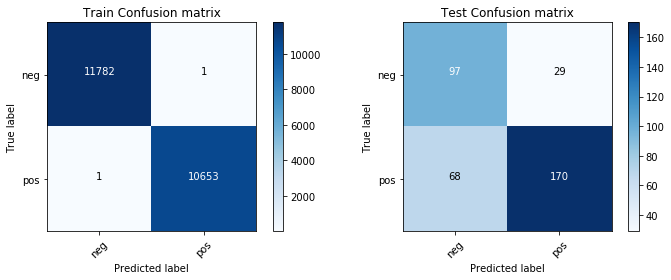

In [162]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_confusion_matrix(cf_matrix_trainlsvmneg, classes= ["neg", "pos"], title='Train Confusion matrix')
plt.subplot(122)
plot_confusion_matrix(cf_matrix_testlsvmneg, classes= ["neg", "pos"], title='Test Confusion matrix')
plt.show()

In [163]:
print('Train Results\n\n', classification_report(reviews_train_df['PosNeg'].values, y_train_predlsvmng, target_names=['Neg', 'Pos']))

Train Results

               precision    recall  f1-score   support

         Neg       1.00      1.00      1.00     11783
         Pos       1.00      1.00      1.00     10654

   micro avg       1.00      1.00      1.00     22437
   macro avg       1.00      1.00      1.00     22437
weighted avg       1.00      1.00      1.00     22437



In [164]:
print('Test Results\n\n', classification_report(reviews_test_df['PosNeg'].values, y_test_predlsvmng, target_names=['Neg', 'Pos']))

Test Results

               precision    recall  f1-score   support

         Neg       0.59      0.77      0.67       126
         Pos       0.85      0.71      0.78       238

   micro avg       0.73      0.73      0.73       364
   macro avg       0.72      0.74      0.72       364
weighted avg       0.76      0.73      0.74       364



## Results

In [165]:
reviews_train_df['pred_NB'] = y_train_pred
reviews_train_df['pred_SVM'] = y_train_predsvmng
reviews_train_df.head()

,description,PosNeg,desc_tokenised,desc_neg_tokenised,pred_NB,pred_SVM
0,Beef ball is good! Try the beef combo pho. The...,1,"[Beef, ball, be, good, Try, beef, combo, pho, ...","[Beef, ball, is, good, !, Try, the, beef, comb...",1,1
1,Egg noodle with prawns and spare rib- deliciou...,1,"[Egg, noodle, prawn, spare, rib-, delicious, b...","[Egg, noodle, with, prawns, and, spare, rib-, ...",1,1
2,Egg noodles with prawns and pork rib ($11) - 3...,-1,"[Egg, noodle, prawn, pork, rib, star, Loved, c...","[Egg, noodles, with, prawns, and, pork, rib, (...",-1,-1
3,Banh mi is an amazing sandwich... Now I have h...,1,"[Banh, mi, be, amazing, sandwich, Now, have, h...","[Banh, mi, is, an, amazing, sandwich, ..., Now...",1,1
4,Have been seeing Nam Nam with ridiculously lon...,-1,"[Have, be, see, Nam, Nam, ridiculously, long, ...","[Have, been, seeing, Nam, Nam, with, ridiculou...",-1,-1


In [166]:
reviews_test_df['pred_NB'] = y_test_pred
reviews_test_df['pred_SVM'] = y_test_predsvmng
reviews_test_df.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,author,datePublished,description,reviewRating,name,cuisine,PosNeg,desc_tokenised,desc_neg_tokenised,pred_NB,pred_SVM
93,Anchisa P.,2018-10-13,4.5 stars. 1 Michelin star Modern Peranakan cu...,4,Candlenut,Asian Fusion,1,"[star, Michelin, star, Modern, Peranakan, cuis...","[4.5, stars, ., 1, Michelin, star, Modern, Per...",1,1
94,Vincent Q.,2018-10-02,This is the first time that I have had Peranka...,5,Candlenut,Asian Fusion,1,"[be, first, time, have, have, Perankan, food, ...","[This, is, the, first, time, that, I, have, ha...",-1,1
95,George L.,2018-07-25,Came here to try Michelin Star fine dining res...,3,Candlenut,Asian Fusion,-1,"[Came, here, try, Michelin, Star, fine, dining...","[Came, here, to, try, Michelin, Star, fine, di...",1,1
96,Sol A.,2018-04-21,Dining here was not the experience that I expe...,3,Candlenut,Asian Fusion,-1,"[Dining, here, be, not, experience, expect, on...","[Dining, here, was, not, NEG_the, NEG_experien...",-1,-1
97,Aimee K.,2018-10-14,"I cannot recommend this restaurant enough, the...",5,Candlenut,Asian Fusion,1,"[not, recommend, restaurant, enough, food, be,...","[I, can, not, recommend, this, restaurant, eno...",1,1


In [167]:
# Save to csv file
reviews_train_df.to_csv(os.path.join('data', 'results', 'train_scored.csv'), index=False)
reviews_test_df.to_csv(os.path.join('data', 'results', 'test_scored.csv'), index=False)

In [168]:
reviews_test_df.groupby('name').groups

{'Candlenut': Int64Index([ 93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
             106, 107, 108, 109, 110, 111, 112, 113],
            dtype='int64'),
 'First Thai Food': Int64Index([238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248], dtype='int64'),
 'Jaan': Int64Index([350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362,
             363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375,
             376, 377],
            dtype='int64'),
 'Jai Thai': Int64Index([865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877,
             878, 879, 880, 881],
            dtype='int64'),
 'Le Bistrot Du Sommelier': Int64Index([316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328,
             329, 330, 331, 332, 333, 334, 335, 336, 337, 338],
            dtype='int64'),
 'Little Saigon': Int64Index([ 260,  261,  262,  263,  264,  265,  266,  267,  268,  269,  270,
              271,  272,  273, 1200, 1201, 1202, 1203, 1204, 1

In [169]:
# Create json
test_json = {}

cuisine_group = reviews_test_df.groupby('cuisine').groups

for a_cuisine in cuisine_group.keys():

    restaurant_group = reviews_test_df.loc[cuisine_group[a_cuisine], :].groupby('name').groups
    cuisine_list = []
    for a_restaurant in restaurant_group.keys():
        d = {}
        d['name'] = a_restaurant
        df = reviews_test_df.loc[restaurant_group[a_restaurant], ['description', 'pred_SVM']]
        df.columns = ['text', 'score']
        reviews_list = df.to_dict('records')
        d['nb_reviews'] = len(reviews_list)
        d['reviews'] = reviews_list
        
        cuisine_list.append(d)
    test_json[a_cuisine] = cuisine_list

In [170]:
test_json.keys()

dict_keys(['Asian Fusion', 'French', 'Thai', 'Vietnamese'])

In [171]:
len(test_json['French'])

4

In [172]:
[ i['name'] for i in test_json['French'] ]

['Jaan', 'Le Bistrot Du Sommelier', 'Prego', 'Saveur']

In [173]:
for i in test_json.keys():
    print(i)
    print([ j['name'] for j in test_json[i] ])

Asian Fusion
['Candlenut', 'National Kitchen By Violet Oon', 'Quentin’s', 'The Square']
French
['Jaan', 'Le Bistrot Du Sommelier', 'Prego', 'Saveur']
Thai
['First Thai Food', 'Jai Thai', 'Whole Earth', 'Yhingthai Palace']
Vietnamese
['Little Saigon', 'Long Phung Vietnamese Restaurant', 'NamNam Noodle Bar - Wheelock Place', 'Sandwich Saigon Cafe']


In [174]:
with open(os.path.join('data', 'results', 'day2group04.json'), 'w') as outfile:
    json.dump(test_json, outfile)